In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk")

In [15]:
import json

In [51]:
splines_df = pd.read_csv("splines.csv")
# ento_df = pd.read_csv("ento_params.csv")
with open("ento_params.json", "r") as f:
    ento_dict = json.load(f)

# Kenya (ATSB)


From example here: https://comps.idmod.org/#explore/Simulations?filters=ExperimentId=d5f37289-7a07-eb11-a2c7-c4346bcb1553,SimulationState=Succeeded&mode=list&orderby=DateCreated+desc&count=100&offset=0&selectedId=6f1276b9-7a07-eb11-a2c7-c4346bcb1553&layout=472C20

> In Western Kenya, transmission intensity at each site was sampled to deliver an average annual prevalence of around 30% by RDT with a range of 10-40% in the presence of ITNs and IRS.

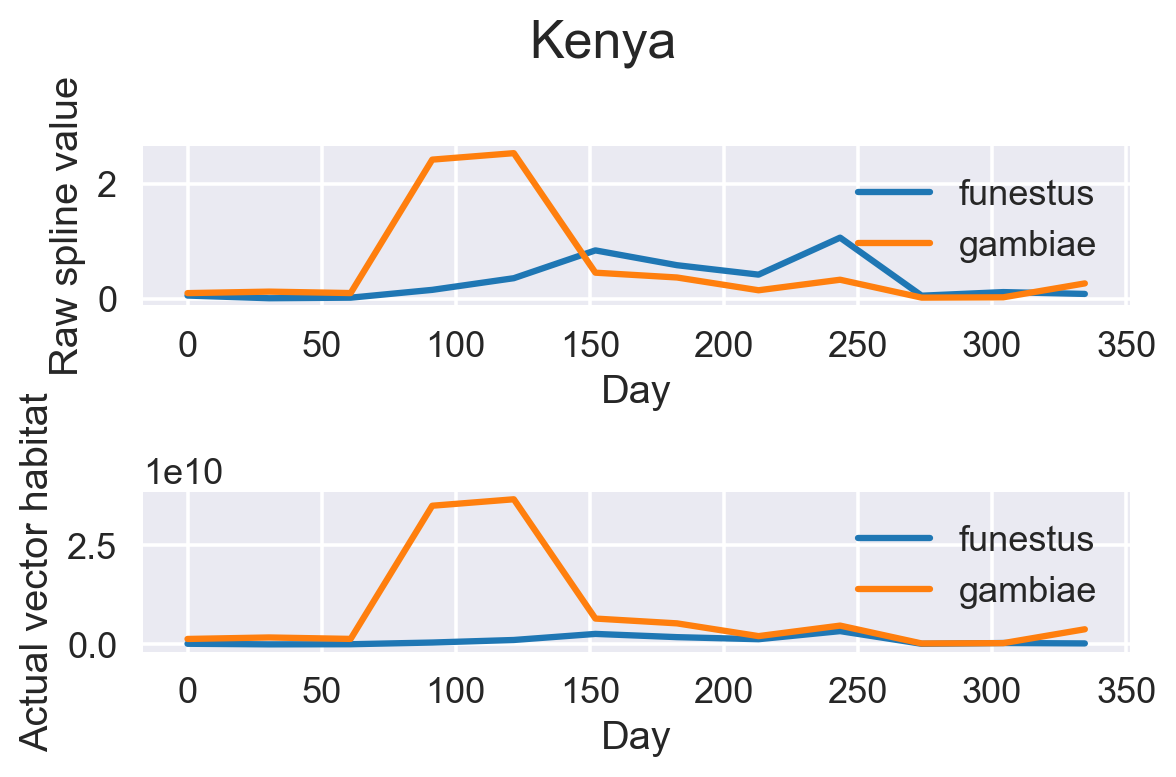

In [34]:
plt.figure(dpi=200)
plt.title("Kenya splines")

kenya_df = splines_df[splines_df["site_name"]=="Kenya"]
plt.subplot(211)
for s,sdf in kenya_df.groupby("species"):
    plt.plot(sdf["time"], sdf["values"], label=s)
plt.xlabel("Day")
plt.ylabel("Raw spline value")
plt.legend()


plt.subplot(212)
for s,sdf in kenya_df.groupby("species"):
    plt.plot(sdf["time"], sdf["values"]*ento_dict["Kenya"][s]["Max_Larval_Capacity"], label=s)
plt.xlabel("Day")
plt.ylabel("Actual vector habitat")
plt.legend()

plt.suptitle("Kenya")
plt.tight_layout()

# Sahel

From example here: https://comps.idmod.org/#explore/Simulations?filters=ExperimentId=ccf7c034-37d6-e911-a2c1-c4346bcb1555&offset=0&count=100&layout=502C50&selectedId=e45163bb-3dd6-e911-a2c1-c4346bcb1555

> A simulation model of a well-mixed village is constructed based on northern Nigeria, with Sahelian seasonality and high-intensity transmission of annual entomological inoculation rate (EIR) 110 and mean annual all-age true prevalence of any infection of around 90% in the absence of any interventions. The vector population is modelled as Anopheles gambiae mosquitoes with 65% anthropophily and 90% indoor biting. Total human population is around 1000 individuals with birth and death rates of 45 per 1000 per year.

Note: anthropophily was actually set to 85!!! 

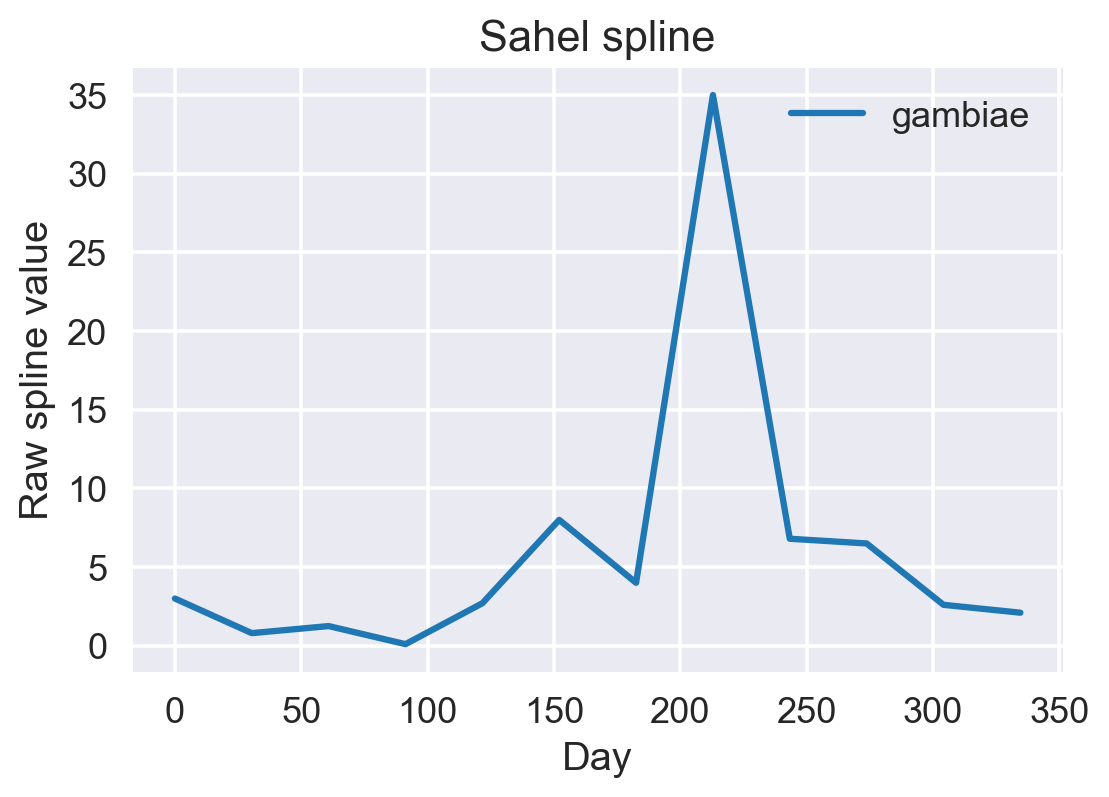

In [33]:
plt.figure(dpi=200)
plt.title("Sahel spline")

sahel_df = splines_df[splines_df["site_name"]=="Sahel"]
plt.plot(sahel_df["time"], sahel_df["values"], label=s)
plt.xlabel("Day")
plt.ylabel("Raw spline value")
plt.legend()


# Zambia and Mozambique

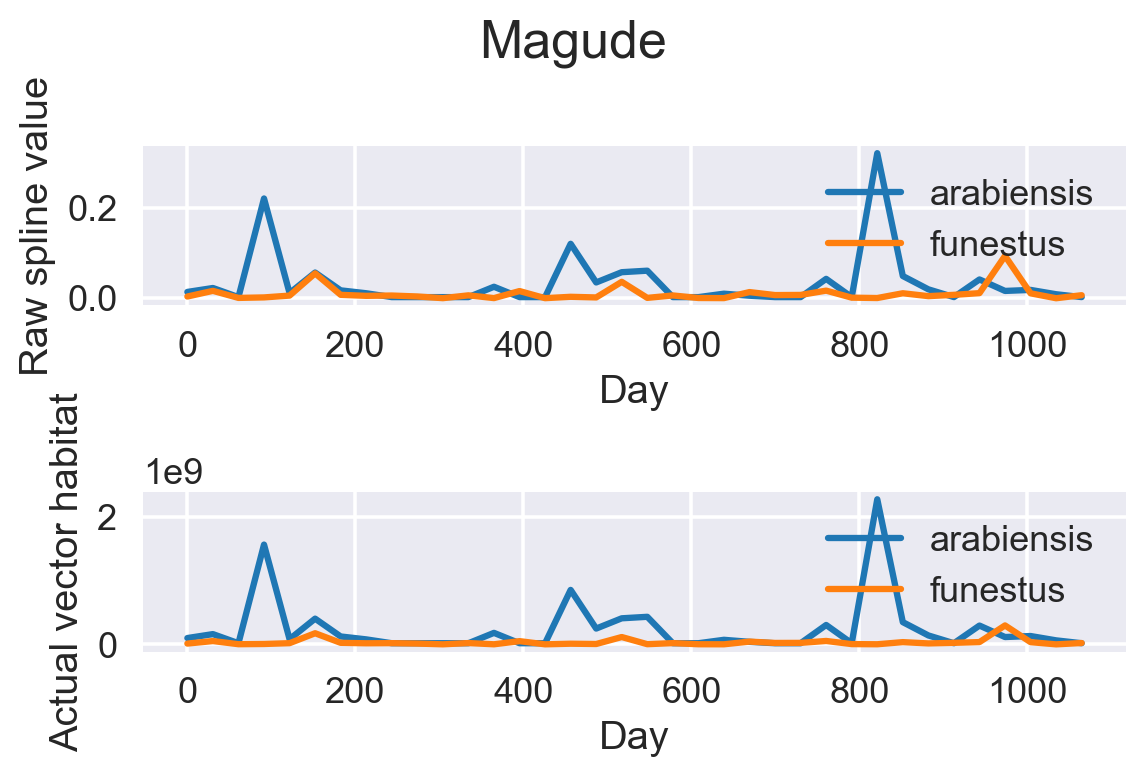

In [45]:
plt.figure(dpi=200)
plt.title("Magude splines")

magude_df = splines_df[splines_df["site_name"]=="Magude"]
plt.subplot(211)
for s,sdf in magude_df.groupby("species"):
    plt.plot(sdf["time"], sdf["values"], label=s)
plt.xlabel("Day")
plt.ylabel("Raw spline value")
plt.legend()


plt.subplot(212)
for s,sdf in magude_df.groupby("species"):
    plt.plot(sdf["time"], sdf["values"]*ento_dict["Magude"][s]["Max_Larval_Capacity"], label=s)
plt.xlabel("Day")
plt.ylabel("Actual vector habitat")
plt.legend()

plt.suptitle("Magude")
plt.tight_layout()

Text(0.5, 0.98, 'Magude')

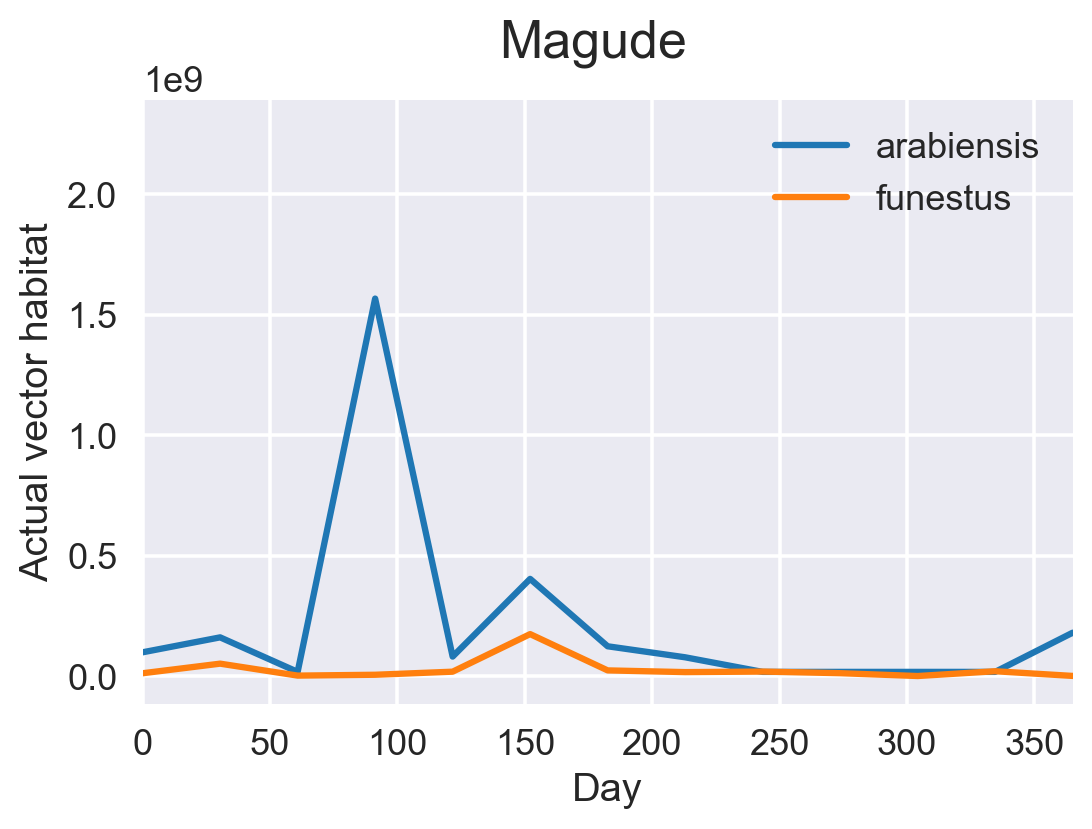

In [48]:
plt.figure(dpi=200)

magude_df = splines_df[splines_df["site_name"]=="Magude"]


for s,sdf in magude_df.groupby("species"):
    plt.plot(sdf["time"], sdf["values"]*ento_dict["Magude"][s]["Max_Larval_Capacity"], label=s)
plt.xlabel("Day")
plt.ylabel("Actual vector habitat")
plt.legend()
plt.xlim([0,365])

plt.suptitle("Magude")


Text(0.5, 0.98, 'Kariba')

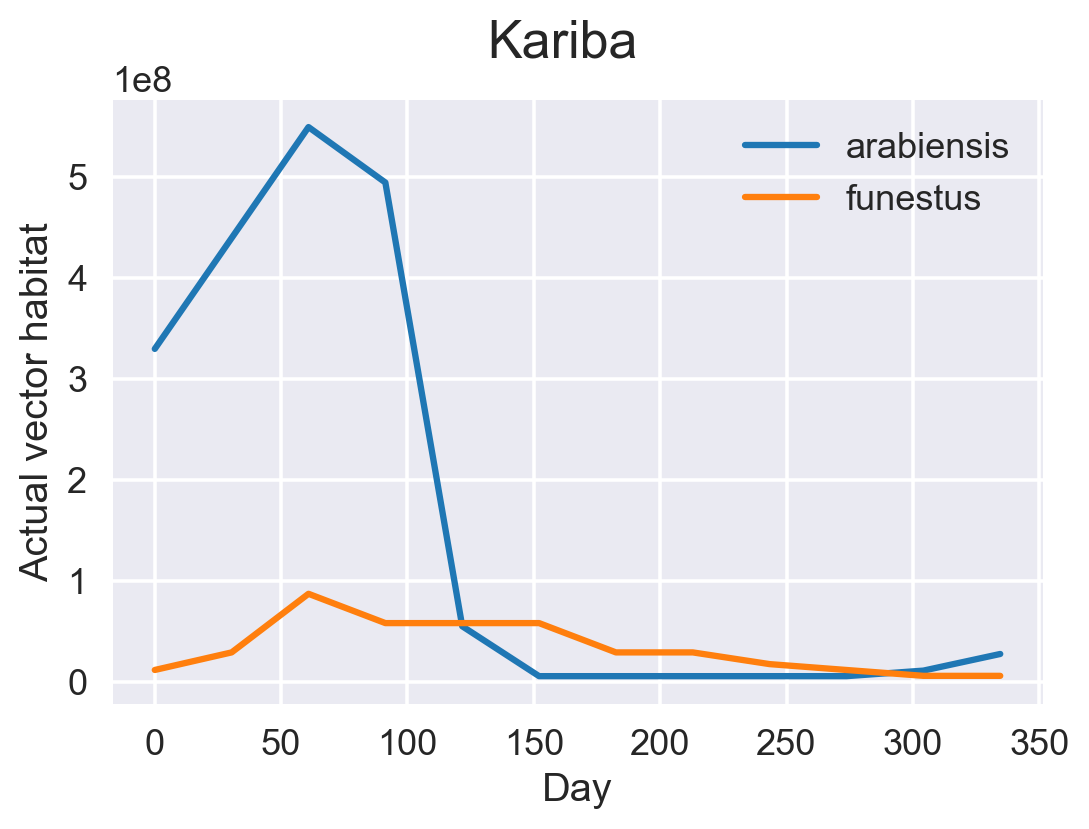

In [54]:
plt.figure(dpi=200)

kariba_df = splines_df[splines_df["site_name"]=="Kariba"]


for s,sdf in kariba_df.groupby("species"):
    plt.plot(sdf["time"], sdf["values"]*ento_dict["Kariba"][s]["Max_Larval_Capacity"], label=s)
plt.xlabel("Day")
plt.ylabel("Actual vector habitat")
plt.legend()

plt.suptitle("Kariba")


# Saving ento params into JSON file

In [49]:
save_dict = {}
save_dict["Kenya"] = {}
save_dict["Kenya"]["gambiae"] = {
    "Max_Larval_Capacity": 14454397707.4592,
    "Indoor_Feeding_Fraction": 0.5,
    "Anthropophily": 0.65
}
save_dict["Kenya"]["funestus"] = {
    "Max_Larval_Capacity": 3162277660.16837,
    "Indoor_Feeding_Fraction": 0.8,
    "Anthropophily": 0.65
}

save_dict["Sahel"] = {}
save_dict["Sahel"]["gambiae"] = {
    "Max_Larval_Capacity": 1000000000,
    "Indoor_Feeding_Fraction": 0.9,
    "Anthropophily": 0.85
}

save_dict["Magude"] = {}
save_dict["Magude"]["arabiensis"] = {
    "Max_Larval_Capacity": 7079457843.841373,
    "Indoor_Feeding_Fraction": 0.5,
    "Anthropophily": 0.65
}
save_dict["Magude"]["funestus"] = {
    "Max_Larval_Capacity": 3162277660.16837,
    "Indoor_Feeding_Fraction": 0.9,
    "Anthropophily": 0.65
}


save_dict["Kariba"] = {}
save_dict["Kariba"]["arabiensis"] = {
    "Max_Larval_Capacity": 549540873.8576248,
    "Indoor_Feeding_Fraction": 0.5,
    "Anthropophily": 0.65
}
save_dict["Kariba"]["funestus"] = {
    "Max_Larval_Capacity": 87096358.99560814,
    "Indoor_Feeding_Fraction": 0.9,
    "Anthropophily": 0.65
}

In [50]:
with open("ento_params.json", "w") as f:
    json.dump(save_dict, f)